In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#Datasets

The project focuses on analyzing Zomato restaurant data for various cities in India. The goal is to gain insights into the Indian food industry by examining customer sentiments in reviews. The analysis involves visualizing data, clustering restaurants into segments, and addressing business cases to aid both customers in finding the best local restaurants and the company in areas of improvement. The data provides valuable information on cuisine, costing, and reviewer metadata, which can be utilized for sentiment analysis and identifying industry critics. Ultimately, the project aims to enhance the understanding of the restaurant landscape and contribute to business growth

In [3]:
reviews=pd.read_csv('/content/drive/MyDrive/Zomato resturant clustering and sentimental analysis/Zomato Restaurant reviews.csv')
restaurant=pd.read_csv('/content/drive/MyDrive/Zomato resturant clustering and sentimental analysis/Zomato Restaurant names and Metadata.csv')

##Review dataset

In [4]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


###Null values

In [5]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [6]:
#considering only the rows with null value
rows_with_null= reviews[reviews.isnull().any(axis=1)]
rows_with_null

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [7]:
rows_with_null.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [8]:
rows_with_null['Restaurant'].value_counts()

American Wild Wings    23
Arena Eleven           15
Hyderabad Chefs         2
Amul                    1
Being Hungry            1
Olive Garden            1
Al Saba Restaurant      1
Domino's Pizza          1
Name: Restaurant, dtype: int64

* Few rows have the valid ratings(which is usefull in calculation of average rating for the restaurants),hence keeping these rows by replacing the corresponding null entry of the 'review' with 'None'.
* Even if we remove all the rows that has null values(in 'rating' column) now,we will loose only 38 rows of the dataset(0.38% of the data),also we will still preserve reviews of all the restaurants.Hence we can remove the rows with null values.

In [9]:
reviews1= reviews.dropna(subset=['Rating'])
reviews1['Review'].fillna('None', inplace=True)

In [10]:
reviews1.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [11]:
reviews1['Time'][0]

'5/25/2019 15:54'

In [12]:
col1=reviews1.columns

###Datatype of each column

In [13]:
for col in col1:
  print(f"For {col}:\n",type(reviews1[col][0]))

For Restaurant:
 <class 'str'>
For Reviewer:
 <class 'str'>
For Review:
 <class 'str'>
For Rating:
 <class 'str'>
For Metadata:
 <class 'str'>
For Time:
 <class 'str'>
For Pictures:
 <class 'numpy.int64'>


####Converting the datatype of 'Time' column to 'datetime'

In [14]:
reviews1['Time'] = pd.to_datetime(reviews1['Time'], errors='coerce')

####Converting the datatype of 'Rating' column to 'float'

In [15]:
# Identify non-numeric values in the 'Rating' column
non_numeric_ratings = reviews1[~reviews1['Rating'].str.isnumeric()]['Rating']
# Display the non-numeric values
print("Non-numeric values in 'Rating' column:", non_numeric_ratings.unique())


Non-numeric values in 'Rating' column: ['3.5' '4.5' '2.5' '1.5' 'Like']


In [16]:
non_numeric_ratings.value_counts()

4.5     69
3.5     47
2.5     19
1.5      9
Like     1
Name: Rating, dtype: int64

In [17]:
# Replace 'Like' values with NaN
reviews1['Rating'].replace('Like', np.nan, inplace=True)
# Convert the 'Rating' column to float, replacing non-numeric values with NaN
reviews1['Rating'] = pd.to_numeric(reviews1['Rating'], errors='coerce')
# Replace NaN values with the median of the ratings
median_rating = reviews1['Rating'].median()
reviews1['Rating'].fillna(median_rating, inplace=True)

In [18]:
reviews1['Rating'].describe()

count    9962.000000
mean        3.601084
std         1.483392
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

##Restaurant dataset

In [19]:
restaurant

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


###Null values

In [20]:
restaurant.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [21]:
restaurant[restaurant['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [22]:
reviews1[reviews1['Restaurant']=='Pot Pourri']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
3000,Pot Pourri,Binnani,I had bad experience here with Masala Papad. I...,3.0,2 Reviews,2019-05-25 14:43:00,0
3001,Pot Pourri,Sravani,Nice ambiance....different and delicious food....,5.0,"10 Reviews , 10 Followers",2019-05-22 13:56:00,1
3002,Pot Pourri,Arunraj R,Affordable good food. I would have given a 5 s...,4.0,"10 Reviews , 64 Followers",2019-05-21 23:12:00,0
3003,Pot Pourri,Asha Tejaswini,I had the worst experience with the food and t...,1.0,"14 Reviews , 10 Followers",2019-05-17 20:36:00,0
3004,Pot Pourri,Chandrasekhar Dasika,"*IF YOU ARE READING THIS, AND SITLL GOING TO T...",1.0,"5 Reviews , 29 Followers",2019-05-13 12:48:00,0
...,...,...,...,...,...,...,...
3095,Pot Pourri,Rakesh Bandiwar,Amazing place to have south Indian cuisine.\nG...,4.0,"44 Reviews , 5210 Followers",2019-01-17 15:01:00,0
3096,Pot Pourri,Aishwariya Kawaii,Our usual hangout place. Every time we think o...,5.0,"10 Reviews , 1 Follower",2019-01-14 16:43:00,0
3097,Pot Pourri,Saketh Goundagouni,I was there with my friends yesterday for dinn...,4.0,"4 Reviews , 2 Followers",2019-01-11 10:37:00,0
3098,Pot Pourri,Tasty Hyderabad,This place was in my bucket list since a very ...,3.0,"75 Reviews , 174 Followers",2019-01-10 17:51:00,9


* Out of the total 105 rows, 54 rows (51.42%) contain null values in the 'Collections' column. Therefore, it is advisable to exclude the 'Collections' column from the analysis, as it is not expected to contribute any meaningful insights
* There is a Null value in 'Timings' which cannot be removed as it has information for the restaurant named 'Pot Pourri',hence we will replace this value 'unknown'.

In [23]:
restaurant.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [24]:
restaurant = restaurant.drop(columns=['Collections'])

# Replace 'NaN' values in the 'Timings' column with 'Unknown'
restaurant['Timings'] = restaurant['Timings'].fillna('Unknown')

In [25]:
restaurant

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,Fast Food,8am to 12:30AM (Mon-Sun)


###Datatype of each column

In [26]:
col2=restaurant.columns
for col in col2:
  print(f"For {col}:\n",type(restaurant[col][0]))

For Name:
 <class 'str'>
For Links:
 <class 'str'>
For Cost:
 <class 'str'>
For Cuisines:
 <class 'str'>
For Timings:
 <class 'str'>


####Converting the datatype of values in 'cost' column to 'float'.

In [27]:

# Remove commas from the 'Cost' column
restaurant['Cost'] = restaurant['Cost'].str.replace(',', '')
# Convert the 'Cost' column to numeric
restaurant['Cost'] = pd.to_numeric(restaurant['Cost'], errors='coerce')

In [28]:
x=restaurant[(restaurant['Cost']>500) & (restaurant['Cost']<=600)]

In [29]:
x.shape

(13, 5)

#EDA

##Distribution of ratings


###1)
Plot showing the distribution of ratings by all the reviewers

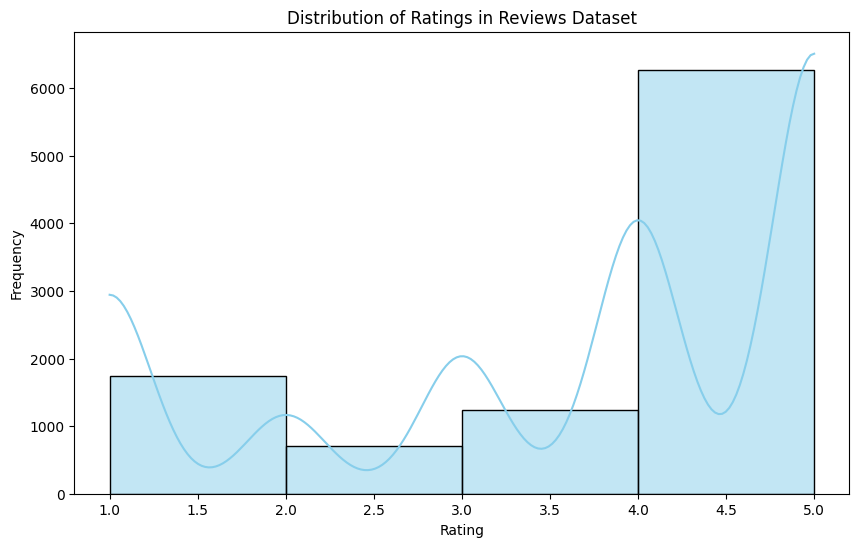

In [30]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Define bin edges based on your preferred alignment
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0]

# Create a histogram of ratings with specified bin edges
sns.histplot(reviews1['Rating'], bins=bin_edges, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Ratings in Reviews Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

* The rating distribution reveals a predominant trend where the majority of reviewers assigned ratings in the range of 4-5, while the fewest reviewers opted for the 2-3 rating bracket.
* Additionally, the second-highest number of reviewers provided ratings within the 1-2 range.

The concentration of higher ratings suggests a general positive sentiment among reviewers

###2)
Plot showing the distribution of ratings by the top reviewers only

In [31]:
# Extract relevant information from 'Metadata' for different formats
metadata_extracted_reviews = reviews1['Metadata'].str.extract('(\d+) Review[s]*')
metadata_extracted_followers = reviews1['Metadata'].str.extract('(\d+) Follower[s]*')
metadata_extracted_both = reviews1['Metadata'].str.extract('(\d+) Review[s]* ,? ?(\d*) Follower[s]*')

# Use extracted values, prioritizing the case where both 'Num_Reviews' and 'Num_Followers' are available
reviews1['Num_Reviews'] = metadata_extracted_both[0].combine_first(metadata_extracted_reviews[0])
reviews1['Num_Followers'] = metadata_extracted_both[1].combine_first(metadata_extracted_followers[0])

# Convert extracted values to numeric, considering NaN as missing values
reviews1[['Num_Reviews', 'Num_Followers']] = reviews1[['Num_Reviews', 'Num_Followers']].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
reviews1[['Num_Reviews', 'Num_Followers']] = reviews1[['Num_Reviews', 'Num_Followers']].fillna(0)

# Group by reviewer and restaurant, then aggregate metadata information
reviewer_restaurants_info = reviews1.groupby(['Reviewer', 'Restaurant']).agg({
    'Num_Reviews': 'max',
    'Num_Followers': 'max',
    'Rating': 'mean',
    'Time': 'max'
}).reset_index()

# Rank reviewers based on the number of reviews, followers
reviewer_restaurants_info['Rank_Reviews'] = reviewer_restaurants_info.groupby('Restaurant')['Num_Reviews'].rank(ascending=False, method='max')
reviewer_restaurants_info['Rank_Followers'] = reviewer_restaurants_info.groupby('Restaurant')['Num_Followers'].rank(ascending=False, method='max')

# Select the top reviewers for each restaurant based on reviews, followers
top_10_reviewers_per_restaurant = reviewer_restaurants_info[
    (reviewer_restaurants_info['Rank_Reviews'] <= 10) |
    (reviewer_restaurants_info['Rank_Followers'] <= 10)
]


In [32]:
top_10_reviewers_per_restaurant['Restaurant'].value_counts()

Mohammedia Shawarma                        18
Dunkin' Donuts                             17
Delhi-39                                   17
Khaan Saab                                 17
Hotel Zara Hi-Fi                           17
                                           ..
Komatose - Holiday Inn Express & Suites    12
Al Saba Restaurant                         11
KFC                                        11
La La Land - Bar & Kitchen                 11
Domino's Pizza                             11
Name: Restaurant, Length: 100, dtype: int64

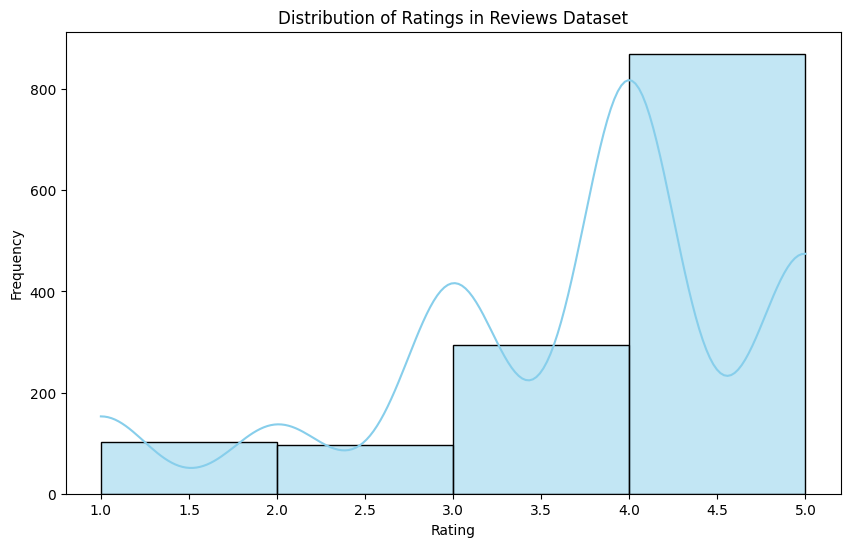

In [33]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Define bin edges based on your preferred alignment
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0]

# Create a histogram of ratings with specified bin edges
sns.histplot(top_10_reviewers_per_restaurant['Rating'], bins=bin_edges, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Ratings in Reviews Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

* The rating distribution depicts a prevailing pattern where most reviewers allocated ratings between 4-5, with the lowest number of reviewers favoring the 2-3 rating bracket (similarly, the 1-2 bracket showed approximately comparable ratings).
* Furthermore, the second-highest count of reviewers submitted ratings falling in the 3-4 range.

The concentration of higher ratings suggests a general positive sentiment among reviewers

##Sentiment Analysis


###Preprocessing 'Review'

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (optional)
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    # Join the words back into a sentence
    preprocessed_text = ' '.join(words)

    return preprocessed_text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
reviews1['Preprocessed_Review'] = reviews1['Review'].apply(preprocess_text)

###Sentiment-TextBlob

In [36]:

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

reviews1['Sentiment'] = reviews1['Review'].apply(get_sentiment)

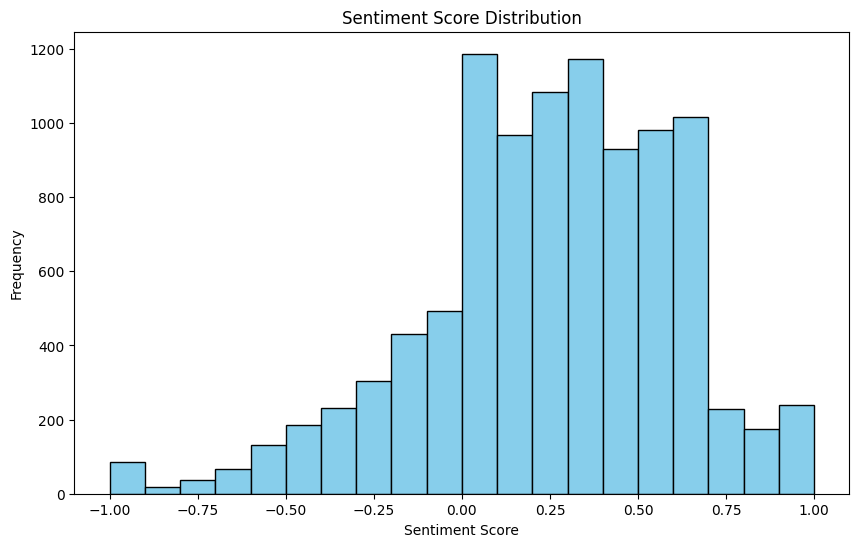

In [37]:
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(reviews1['Sentiment'], bins=20, color='skyblue', edgecolor='black')

plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [38]:
reviews1['Sentiment'].describe()

count    9962.000000
mean        0.250566
std         0.364981
min        -1.000000
25%         0.004167
50%         0.278920
75%         0.505675
max         1.000000
Name: Sentiment, dtype: float64

 We will consider the following.
 * Sentiments above the median(0.2789) are Positive sentiment.
 * Sentiments below -0.2789 are Negative sentiment.

###Senntiment-Wordcloud

In [39]:
positive=reviews1[reviews1['Sentiment']>0.28]

negative=reviews1[reviews1['Sentiment']<-0.28]

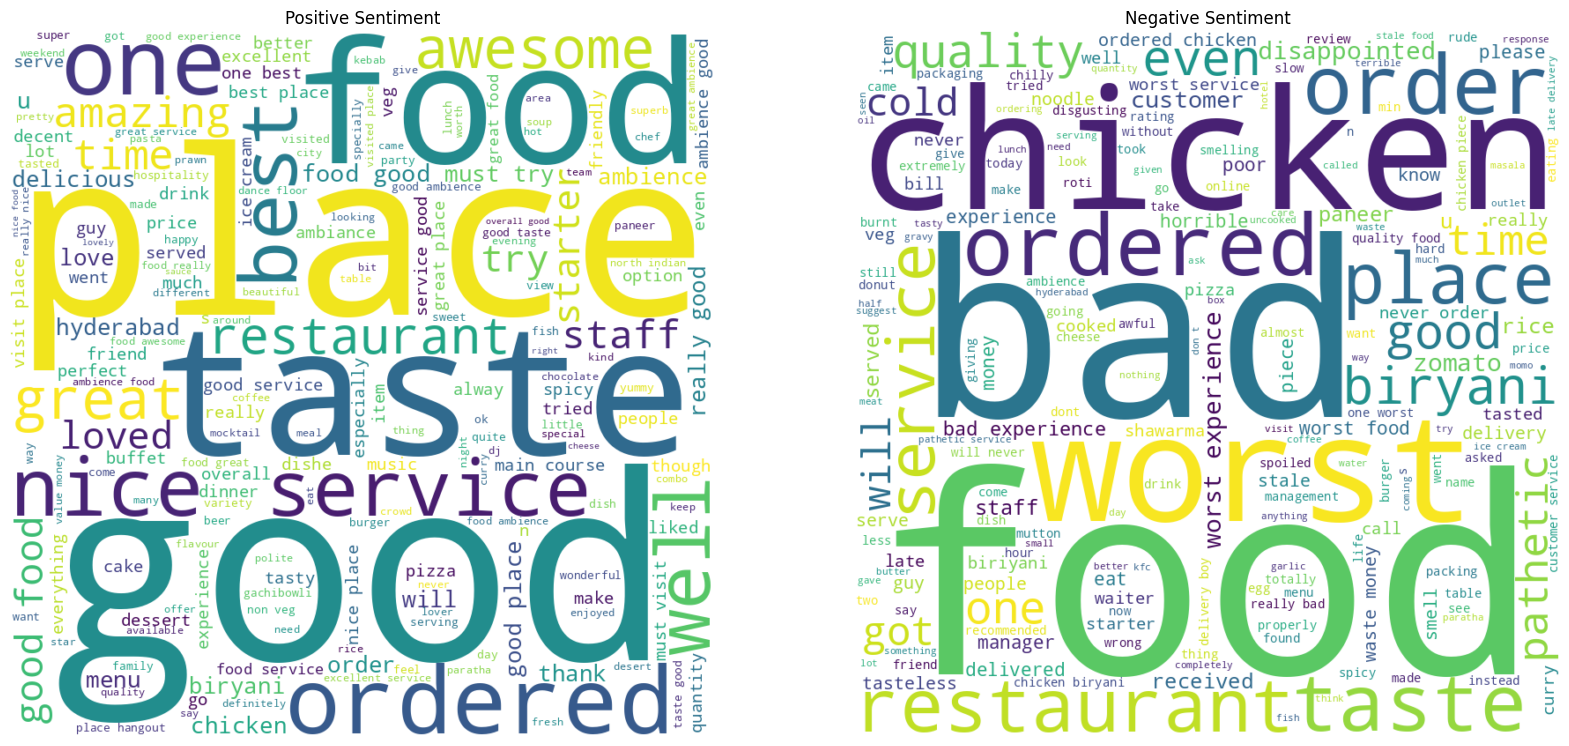

In [40]:
from wordcloud import WordCloud, STOPWORDS
# Function to generate word clouds
def generate_wordcloud(sentiment, title):
    comment_words = ''
    for val in sentiment.Review:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "

    # Remove stopwords
    stopwords = set(STOPWORDS)
    comment_words = ' '.join([word for word in comment_words.split() if word.lower() not in stopwords])

    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=10, colormap='viridis').generate(comment_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

# Create subplots
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
generate_wordcloud(positive, "Positive Sentiment")


plt.subplot(1, 2, 2)
generate_wordcloud(negative, "Negative Sentiment")

plt.show()

##Average rating for each restaurant
When calculating the average rating for a restaurant, using all ratings might provide a more comprehensive view, as it considers the opinions of a broader audience.

In [41]:
mean_rating_by_restaurant = reviews1.groupby('Restaurant')['Rating'].mean().reset_index()

# Display the mean rating for each restaurant
print(mean_rating_by_restaurant)

                               Restaurant  Rating
0                       10 Downing Street    3.80
1                                13 Dhaba    3.48
2          3B's - Buddies, Bar & Barbecue    4.76
3               AB's - Absolute Barbecues    4.88
4                       Absolute Sizzlers    3.62
..                                    ...     ...
95             Urban Asia - Kitchen & Bar    3.65
96  Yum Yum Tree - The Arabian Food Court    3.56
97        Zega - Sheraton Hyderabad Hotel    4.45
98               Zing's Northeast Kitchen    3.65
99                                eat.fit    3.20

[100 rows x 2 columns]


In [42]:
reviews1.isnull().sum()

Restaurant             0
Reviewer               0
Review                 0
Rating                 0
Metadata               0
Time                   0
Pictures               0
Num_Reviews            0
Num_Followers          0
Preprocessed_Review    0
Sentiment              0
dtype: int64

In [43]:

fig = px.scatter(
    mean_rating_by_restaurant,
    x='Rating',
    y='Restaurant',
    size='Rating',
    size_max=50,  # Adjust the maximum size of the bubble
    hover_name='Restaurant',  # Display restaurant name on hover
    labels={'Rating': 'Mean Rating'},
    color='Rating',
    title='Restaurants and the mean ratings by Reviewers'
)

fig.update_layout(
    yaxis=dict(
        title=None,
        tickmode='array',
        tickvals=[]  # Empty array to remove y-axis labels
    )
)
# Show the plot
fig.show()

##Number of restaurants for each price range

In [44]:
# Define the bins and labels for price ranges
bins = [0, 500, 600, 700, 800, 900, 1000, 1500, 2000, float('inf')]
labels = ['Below 500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1500', '1500-2000', 'Above 2000']

# Create a new column 'Price Range' based on the bins
restaurant['Price Range'] = pd.cut(restaurant['Cost'], bins=bins, labels=labels)

# Create an interactive countplot using Plotly
fig = px.histogram(
    restaurant,
    x='Price Range',
    title='Count of Restaurants in Different Price Range',
    labels={'count': 'Count', 'Price Range': 'Price Range'},
    category_orders={'Price Range': labels},
    color='Price Range',  # Assign different colors to bars based on the 'Price Range'
    hover_data={'Price Range',}
)

# Set the figure size
fig.update_layout(width=800, height=600)

# Show the figure
fig.show()

##Number of restaurants for each cuisine

In [45]:
# Create a list of all unique cuisines
unique_cuisines = set(','.join(restaurant['Cuisines'].dropna()).split(', '))

# Convert the 'Cuisines' column to a list of cuisines for each row
restaurant['Cuisines'] = restaurant['Cuisines'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# Display the unique cuisines and the modified 'Cuisines' column
print("Unique Cuisines:", unique_cuisines)
print("\nModified 'Cuisines' column:")
print(restaurant['Cuisines'])

Unique Cuisines: {'South Indian,Ice Cream', 'Momos,Desserts', 'Seafood,Fast Food', 'Kebab,North Indian', 'Asian', 'Malaysian', 'Chinese,Fast Food,Thai', 'Cafe', 'Desserts,American', 'Fast Food,North Indian', 'Biryani,Fast Food,Andhra', 'Momos,North Indian', 'European,Mughlai', 'Biryani', 'Seafood', 'North Indian,Burger', 'Burger,Fast Food', 'Asian,North Eastern', 'Andhra,Andhra', 'Biryani,North Indian', 'Hyderabadi,Burger', 'Asian,Cafe', 'Italian,Kebab', 'BBQ,Continental', 'Chinese,Chinese', 'American', 'Continental,North Indian', 'Kebab', 'Hyderabadi', 'Desserts,Biryani', 'Chinese,South Indian', 'Desserts,Cafe', 'Japanese', 'Spanish,Bakery', 'Hyderabadi,North Indian', 'Burger', 'Arabian,Continental,North Indian', 'Fast Food', 'Italian', 'Biryani,Biryani', 'Wraps', 'Desserts,Finger Food', 'Finger Food,European', 'Continental,Continental,Mexican', 'North Indian,Biryani', 'Chinese', 'Fast Food,Chinese', 'Beverages,Bakery', 'Beverages,Asian', 'Asian,North Indian', 'Mughlai', 'Salad,Bakery

In [46]:
all_cuisines_list = [cuisine for sublist in restaurant['Cuisines'].dropna() for cuisine in sublist]

# Create a set to get unique cuisines
unique_cuisines_set = set(all_cuisines_list)

# Convert the set back to a list
unique_cuisines_list = list(unique_cuisines_set)

# Display the unique cuisines
print("Unique Cuisines:", unique_cuisines_list)

Unique Cuisines: ['BBQ', 'American', 'Kebab', 'Mughlai', 'Hyderabadi', 'Continental', 'Thai', 'Arabian', 'Street Food', 'Juices', 'Japanese', 'Mediterranean', 'Asian', 'North Indian', 'Malaysian', 'Cafe', 'Burger', 'Andhra', 'Finger Food', 'Fast Food', 'Healthy Food', 'Sushi', 'Beverages', 'Desserts', 'Mexican', 'Indonesian', 'Biryani', 'Italian', 'Pizza', 'Wraps', 'Bakery', 'Seafood', 'Lebanese', 'Momos', 'Ice Cream', 'Goan', 'Modern Indian', 'European', 'Mithai', 'North Eastern', 'Chinese', 'Spanish', 'South Indian', 'Salad']


In [47]:
cuisine_rest = {}

for cuisine in unique_cuisines_list:
    rest = []
    for i in range(len(restaurant['Name'])):
        if cuisine in restaurant['Cuisines'][i]:
            rest.append(restaurant['Name'][i])
    cuisine_rest[cuisine] = rest

# Display the dictionary
for cuisine, restaurants in cuisine_rest.items():
    print(f"{cuisine}: {restaurants}")

BBQ: ['Barbeque Nation', 'The Indi Grill']
American: ['Hyper Local', 'Absolute Sizzlers', 'B-Dubs', 'The Foodie Monster Kitchen', "GD's", 'American Wild Wings']
Kebab: ['Beyond Flavours', 'Hyper Local', 'Barbeque Nation', 'La La Land - Bar & Kitchen', 'Prism Club & Kitchen', 'Tandoori Food Works']
Mughlai: ['Behrouz Biryani', 'Pista House', 'Aromas@11SIX', 'Eat India Company', 'Khaan Saab', 'Hyderabadi Daawat']
Hyderabadi: ['Kritunga Restaurant', 'Yum Yum Tree - The Arabian Food Court', 'Al Saba Restaurant', 'Hyderabadi Daawat']
Continental: ['Beyond Flavours', 'Over The Moon Brew Company', "The Fisherman's Wharf", 'eat.fit', 'Absolute Sizzlers', '10 Downing Street', 'SKYHY', 'Tiki Shack', 'The Glass Onion', 'Deli 9 Bistro', 'Frio Bistro', 'Gal Punjab Di', 'Diners Pavilion', 'Feast - Sheraton Hyderabad Hotel', 'PourHouse7', 'Prism Club & Kitchen', 'The Tilt Bar Republic', 'Olive Garden', 'Arena Eleven', 'Cascade - Radisson Hyderabad Hitec City', 'Collage - Hyatt Hyderabad Gachibowli']


In [48]:
cuisine_rest

{'BBQ': ['Barbeque Nation', 'The Indi Grill'],
 'American': ['Hyper Local',
  'Absolute Sizzlers',
  'B-Dubs',
  'The Foodie Monster Kitchen',
  "GD's",
  'American Wild Wings'],
 'Kebab': ['Beyond Flavours',
  'Hyper Local',
  'Barbeque Nation',
  'La La Land - Bar & Kitchen',
  'Prism Club & Kitchen',
  'Tandoori Food Works'],
 'Mughlai': ['Behrouz Biryani',
  'Pista House',
  'Aromas@11SIX',
  'Eat India Company',
  'Khaan Saab',
  'Hyderabadi Daawat'],
 'Hyderabadi': ['Kritunga Restaurant',
  'Yum Yum Tree - The Arabian Food Court',
  'Al Saba Restaurant',
  'Hyderabadi Daawat'],
 'Continental': ['Beyond Flavours',
  'Over The Moon Brew Company',
  "The Fisherman's Wharf",
  'eat.fit',
  'Absolute Sizzlers',
  '10 Downing Street',
  'SKYHY',
  'Tiki Shack',
  'The Glass Onion',
  'Deli 9 Bistro',
  'Frio Bistro',
  'Gal Punjab Di',
  'Diners Pavilion',
  'Feast - Sheraton Hyderabad Hotel',
  'PourHouse7',
  'Prism Club & Kitchen',
  'The Tilt Bar Republic',
  'Olive Garden',
  'Are

In [49]:
# Count the number of restaurants for each cuisine
cuisine_counts = {cuisine: len(restaurants) for cuisine, restaurants in cuisine_rest.items()}

# Create a DataFrame for plotting
plot_data = {'Cuisine': list(cuisine_counts.keys()), 'Number of Restaurants': list(cuisine_counts.values())}
df_plot = pd.DataFrame(plot_data)

# Sort the DataFrame by count in descending order
df_plot = df_plot.sort_values(by='Number of Restaurants', ascending=False)

# Plot interactive bar chart using Plotly
fig = px.bar(
    df_plot,
    x='Number of Restaurants',
    y='Cuisine',
    orientation='h',
    title='Number of Restaurants for Each Cuisine',
    labels={'Number of Restaurants': 'Number of Restaurants'},
    color='Cuisine',
    hover_data={'Number of Restaurants': ':.0f'}

)
fig.update_layout(width=1200, height=900)
# Show the figure
fig.show()

* North Indian cuisine is prevalent in the majority of restaurants (61 establishments).
* More than 10 restaurants offer Desserts, Italian, Fast Food, Asian, Biryani, Continental, Chinese, and North Indian.
* However, for the remaining cuisines, there are fewer than 10 restaurants each, highlighting the need for the company to actively seek and include data on restaurants offering these specific culinary options.

#Feature engineering

##Average ratings
We will add a new feature which has the average ratings for each restaurant

In [50]:
# Merge the calculated average ratings with the 'restaurant' DataFrame
restaurant=pd.merge(restaurant, mean_rating_by_restaurant, how='left', left_on='Name', right_on='Restaurant')


In [51]:
# Drop the redundant 'Restaurant' column from the merged DataFrame
restaurant = restaurant.drop('Restaurant', axis=1)

In [52]:
restaurant

,Name,Links,Cost,Cuisines,Timings,Price Range,Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",700-800,4.28
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,700-800,4.70
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1000-1500,4.66
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,700-800,3.21
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1000-1500,4.34
...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"[Fast Food, Salad]",11 AM to 11 PM,500-600,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",Below 500,NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,Below 500,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,[Fast Food],8am to 12:30AM (Mon-Sun),Below 500,NaN


##Cuisine Transformation: One-Hot Encoding
One-hot encoding for every distinct cuisine listed in the "Cuisines" column. The resulting columns serve as indicators, with a value of 1 denoting the presence and 0 denoting the absence of each specific cuisine for every restaurant in the dataset.We have used 'MultiLabelBinarizer' since each single data point(restaurant) can have multiple categories(cuisines) in this dataset.

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming 'Cuisines' column contains lists of cuisines
mlb = MultiLabelBinarizer()

# Transform the 'Cuisines' column into one-hot encoded format
cuisine_encoded = pd.DataFrame(mlb.fit_transform(restaurant['Cuisines']), columns=mlb.classes_, index=restaurant.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
restaurant = pd.concat([restaurant, cuisine_encoded], axis=1)

##Total number of cuisines
We will add a new feature for the total number of cuisines provided by each restaurant

In [54]:

restaurant['Total_Cuisines'] = restaurant['Cuisines'].apply(len)

In [55]:
restaurant

,Name,Links,Cost,Cuisines,Timings,Price Range,Rating,American,Andhra,Arabian,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,Total_Cuisines
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",700-800,4.28,0,0,0,...,0,0,0,1,0,0,0,0,0,6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,700-800,4.70,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1000-1500,4.66,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,700-800,3.21,0,0,0,...,0,0,1,0,0,0,0,0,0,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1000-1500,4.34,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,"[Fast Food, Salad]",11 AM to 11 PM,500-600,NaN,0,0,0,...,0,1,0,0,0,0,0,0,0,2
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,2
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,3
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,[Fast Food],8am to 12:30AM (Mon-Sun),Below 500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##Checking for null values

In [56]:
restaurant.isnull().sum()

Name              0
Links             0
Cost              0
Cuisines          0
Timings           0
Price Range       0
Rating            5
American          0
Andhra            0
Arabian           0
Asian             0
BBQ               0
Bakery            0
Beverages         0
Biryani           0
Burger            0
Cafe              0
Chinese           0
Continental       0
Desserts          0
European          0
Fast Food         0
Finger Food       0
Goan              0
Healthy Food      0
Hyderabadi        0
Ice Cream         0
Indonesian        0
Italian           0
Japanese          0
Juices            0
Kebab             0
Lebanese          0
Malaysian         0
Mediterranean     0
Mexican           0
Mithai            0
Modern Indian     0
Momos             0
Mughlai           0
North Eastern     0
North Indian      0
Pizza             0
Salad             0
Seafood           0
South Indian      0
Spanish           0
Street Food       0
Sushi             0
Thai              0


* We can see that there are 5 null values in Ratings column.
* We will check the correlation of the cost,Total_cuisines and availability of each of the cuisines with the rating.If they are found to be correlated to a significantly,we will use regression to find the rating for these 5 data points.Otherwise we will take the mean/median of the ratings.


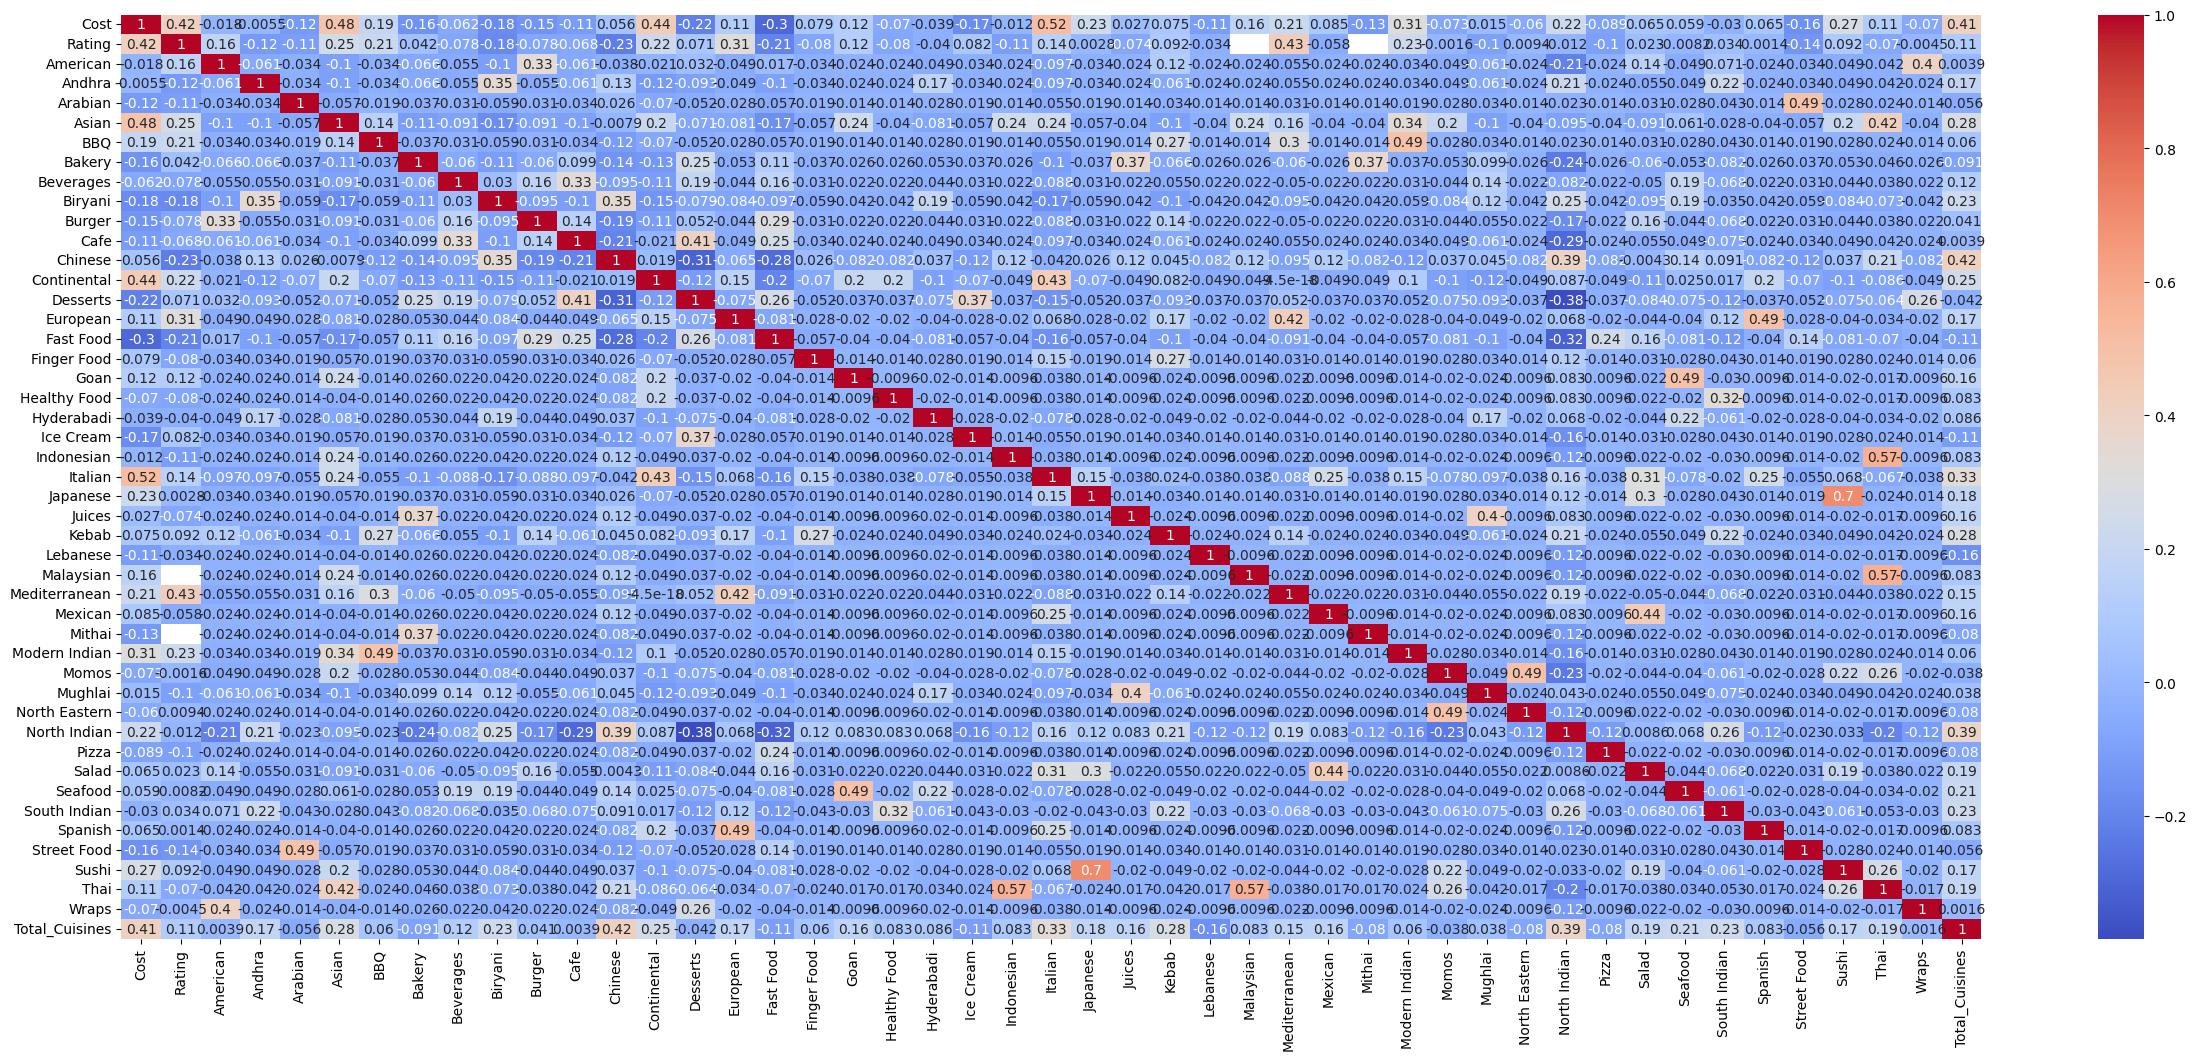

In [57]:
# Define the columns to exclude
excluded_columns = ['Name', 'Links', 'Cuisines', 'Timings', 'Price Range']

#Identify Null Values
missing_ratings = restaurant[restaurant['Rating'].isnull()]

# Correlation Analysis
# Exclude unwanted columns when creating the correlation matrix
correlation_matrix = restaurant.drop(excluded_columns, axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Set a threshold for correlation
correlation_threshold = 0.1

# Identify features with correlation above the threshold
correlated_features = correlation_matrix['Rating'][(correlation_matrix['Rating'] > correlation_threshold) | (-correlation_matrix['Rating'] > correlation_threshold)].index.tolist()

# Exclude unwanted features
correlated_features = [feature for feature in correlated_features if feature not in excluded_columns]

In [58]:
correlated_features

['Cost',
 'Rating',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Biryani',
 'Chinese',
 'Continental',
 'European',
 'Fast Food',
 'Goan',
 'Indonesian',
 'Italian',
 'Mediterranean',
 'Modern Indian',
 'Mughlai',
 'Pizza',
 'Street Food',
 'Total_Cuisines']

Using these features to perform regression and finding the missing ratings

###Regression

In [59]:
data=restaurant[['Name','Cuisines','Cost',

 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Biryani',
 'Chinese',
 'Continental',
 'European',
 'Fast Food',
 'Goan',
 'Indonesian',
 'Italian',
 'Mediterranean',
 'Modern Indian',
 'Mughlai',
 'Pizza',
 'Street Food',
 'Total_Cuisines',
'Rating']]
Missing_data=data[data['Rating'].isnull()]
train_test_data=data.dropna(axis=0)

In [60]:
data

,Name,Cuisines,Cost,American,Andhra,Arabian,Asian,BBQ,Biryani,Chinese,...,Goan,Indonesian,Italian,Mediterranean,Modern Indian,Mughlai,Pizza,Street Food,Total_Cuisines,Rating
0,Beyond Flavours,"[Chinese, Continental, Kebab, European, South ...",800,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,4.28
1,Paradise,"[Biryani, North Indian, Chinese]",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,"[Asian, Mediterranean, North Indian, Desserts]",1300,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,"[Biryani, North Indian, Chinese, Seafood, Beve...",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,"[Asian, Continental, North Indian, Chinese, Me...",1200,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,5,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,"[Fast Food, Salad]",600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
101,Sweet Basket,"[Bakery, Mithai]",200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
102,Angaara Counts 3,"[North Indian, Biryani, Chinese]",500,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,NaN
103,Wich Please,[Fast Food],250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [61]:
train_test_data

,Name,Cuisines,Cost,American,Andhra,Arabian,Asian,BBQ,Biryani,Chinese,...,Goan,Indonesian,Italian,Mediterranean,Modern Indian,Mughlai,Pizza,Street Food,Total_Cuisines,Rating
0,Beyond Flavours,"[Chinese, Continental, Kebab, European, South ...",800,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,4.280
1,Paradise,"[Biryani, North Indian, Chinese]",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,4.700
2,Flechazo,"[Asian, Mediterranean, North Indian, Desserts]",1300,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4,4.660
3,Shah Ghouse Hotel & Restaurant,"[Biryani, North Indian, Chinese, Seafood, Beve...",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,3.210
4,Over The Moon Brew Company,"[Asian, Continental, North Indian, Chinese, Me...",1200,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,5,4.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,"[North Indian, Chinese]",400,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2.900
96,Hyderabadi Daawat,"[Hyderabadi, Chinese, Mughlai]",600,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3,3.830
97,Zega - Sheraton Hyderabad Hotel,"[Asian, Sushi]",1750,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,4.450
98,Triptify,[North Indian],400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.550


In [62]:
Missing_data

,Name,Cuisines,Cost,American,Andhra,Arabian,Asian,BBQ,Biryani,Chinese,...,Goan,Indonesian,Italian,Mediterranean,Modern Indian,Mughlai,Pizza,Street Food,Total_Cuisines,Rating
100,IndiBlaze,"[Fast Food, Salad]",600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
101,Sweet Basket,"[Bakery, Mithai]",200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
102,Angaara Counts 3,"[North Indian, Biryani, Chinese]",500,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,NaN
103,Wich Please,[Fast Food],250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
104,Republic Of Noodles - Lemon Tree Hotel,"[Thai, Asian, Chinese, Malaysian]",1700,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4,NaN


###Dependent and independent features

In [63]:
X=train_test_data[['Cost',

 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Biryani',
 'Chinese',
 'Continental',
 'European',
 'Fast Food',
 'Goan',
 'Indonesian',
 'Italian',
 'Mediterranean',
 'Modern Indian',
 'Mughlai',
 'Pizza',
 'Street Food',
 'Total_Cuisines']]
y=train_test_data['Rating']

In [64]:
y

0     4.280
1     4.700
2     4.660
3     3.210
4     4.340
      ...  
95    2.900
96    3.830
97    4.450
98    3.550
99    3.745
Name: Rating, Length: 100, dtype: float64

###Train_test_split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###Training and prediction

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [67]:
y_pred=model.predict(X_test)

In [68]:

rmse=(mean_squared_error(y_test,y_pred))**0.5

In [69]:
rmse

0.34689912874948947

Considering the range of ratings (1-5), an RMSE of 0.34 is relatively small, indicating that the model is making accurate predictions within the context of the target variable

####Predictions for the missing values

In [70]:
X_p=Missing_data.iloc[:,2:22]
y_p=model.predict(X_p)

In [71]:
#Adding the predictions
Missing_data['Rating']=y_p

In [72]:
Missing_data

,Name,Cuisines,Cost,American,Andhra,Arabian,Asian,BBQ,Biryani,Chinese,...,Goan,Indonesian,Italian,Mediterranean,Modern Indian,Mughlai,Pizza,Street Food,Total_Cuisines,Rating
100,IndiBlaze,"[Fast Food, Salad]",600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3.382361
101,Sweet Basket,"[Bakery, Mithai]",200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3.515278
102,Angaara Counts 3,"[North Indian, Biryani, Chinese]",500,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,3.357685
103,Wich Please,[Fast Food],250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.290451
104,Republic Of Noodles - Lemon Tree Hotel,"[Thai, Asian, Chinese, Malaysian]",1700,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4,3.666819


In [73]:
# Concatenate Missing_data vertically to train_test_data
final_data = pd.concat([train_test_data, Missing_data], ignore_index=True)

In [74]:
final_data

,Name,Cuisines,Cost,American,Andhra,Arabian,Asian,BBQ,Biryani,Chinese,...,Goan,Indonesian,Italian,Mediterranean,Modern Indian,Mughlai,Pizza,Street Food,Total_Cuisines,Rating
0,Beyond Flavours,"[Chinese, Continental, Kebab, European, South ...",800,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6,4.280000
1,Paradise,"[Biryani, North Indian, Chinese]",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,4.700000
2,Flechazo,"[Asian, Mediterranean, North Indian, Desserts]",1300,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4,4.660000
3,Shah Ghouse Hotel & Restaurant,"[Biryani, North Indian, Chinese, Seafood, Beve...",800,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,3.210000
4,Over The Moon Brew Company,"[Asian, Continental, North Indian, Chinese, Me...",1200,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,5,4.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,"[Fast Food, Salad]",600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3.382361
101,Sweet Basket,"[Bakery, Mithai]",200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3.515278
102,Angaara Counts 3,"[North Indian, Biryani, Chinese]",500,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,3.357685
103,Wich Please,[Fast Food],250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.290451


###Data required for ML model

In [75]:
#Part of the restaurant dataset that has null value in 'Rating'
null=restaurant[restaurant['Rating'].isnull()]
#Remaining part
remain=restaurant.dropna(axis=0)


In [76]:
#Replacing the null value with the predictions
null['Rating']=y_p
# Concatenate the above dataframe vertically to remain data
data_cluster = pd.concat([remain, null], ignore_index=True)

In [77]:
data_cluster.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Price Range', 'Rating',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps', 'Total_Cuisines'],
      dtype='object')

In [78]:
excluded_columns = ['Name', 'Links', 'Cuisines', 'Timings', 'Price Range']
features=[feature for feature in data_cluster.columns if feature not in excluded_columns]
ML_data=data_cluster[features]

In [79]:
ML_data

,Cost,Rating,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,Total_Cuisines
0,800,4.280000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
1,800,4.700000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2,1300,4.660000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,800,3.210000,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,5
4,1200,4.340000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,600,3.382361,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
101,200,3.515278,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
102,500,3.357685,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
103,250,3.290451,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Considering the columns 'Cost','Rating' for clustering.

In [80]:
X_model=ML_data[['Cost','Rating']]


#ML Models

##Applying standard scaler

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_model=scaler.fit_transform(X_model)

##KMeans Clustering

###Elbow curve
Finding k by plotting inertia with number of clusters.

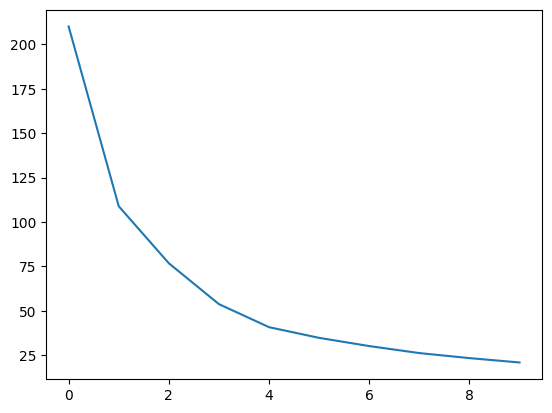

In [82]:
from sklearn.cluster import KMeans
#Finding the optimum k considering 10 clusters
loss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit_predict(X_model)
  loss.append(km.inertia_)
plt.plot(loss)

Observing the elbow curve, the elbow point is determined to be approximately at k=4, marked by the point where the curve exhibits a noticeable change in slope, indicating a significant reduction

###Clustering
Using the k value of 4 found from elbow curve

In [83]:
km=KMeans(n_clusters=4,n_init=10)
km.fit_predict(X_model)
clusters=km.labels_

In [84]:
clusters

array([0, 3, 3, 2, 3, 3, 2, 0, 1, 0, 2, 3, 0, 1, 3, 2, 0, 2, 1, 2, 0, 1,
       3, 0, 1, 1, 1, 3, 2, 2, 2, 2, 0, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 2, 2, 0, 1,
       0, 1, 1, 3, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 3, 3, 1, 0, 2, 2, 0, 3, 0, 0, 2, 0, 2, 2, 1], dtype=int32)

In [85]:
#adding the clusters to the dataset data_cluster
data_cluster['cluster_kmean']=clusters


###Plot

<Axes: xlabel='Rating', ylabel='Cost'>

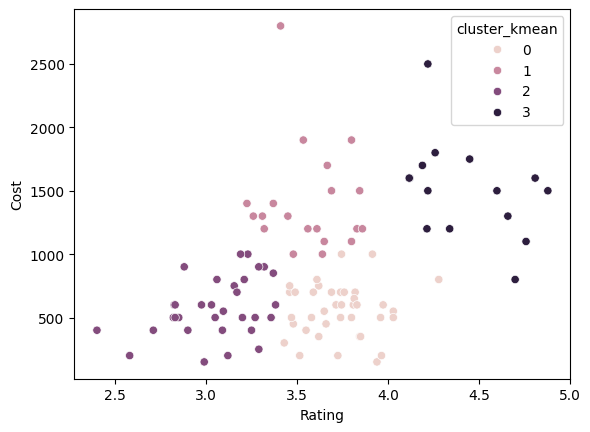

In [86]:
sns.scatterplot(data=data_cluster, x='Rating', y='Cost', hue='cluster_kmean')

##GMM

###Clustering
In this case we will consider 5 clusters and find out how the clusters look like.

In [87]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
labels_gmm= gmm.fit_predict(X_model)

In [88]:
#adding the clusters to the dataset data_cluster
data_cluster['cluster_gmm']=labels_gmm

###Plot

<Axes: xlabel='Rating', ylabel='Cost'>

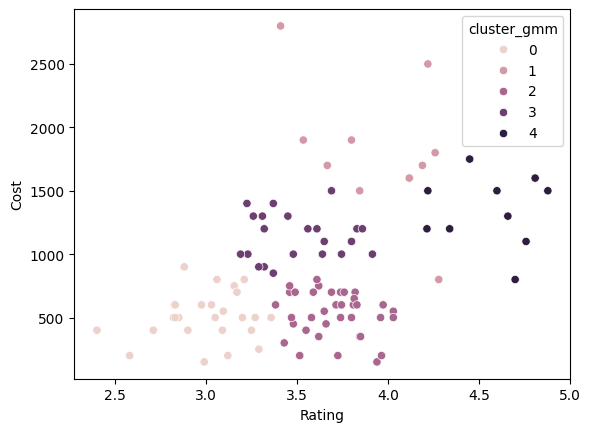

In [89]:
sns.scatterplot(data=data_cluster, x='Rating', y='Cost', hue='cluster_gmm')

#Inference

* By considering GMM clustering model,we have found 5 categories of restaurants(clusters).
1. Low rating and low cost restaurants(cluster 0).
2. Moderate rating and high cost restaurants(cluster 1).
3. Moderate rating and low cost restaurants(cluster 2).
4. Moderate rating and Moderate cost restaurants(cluster 3).
5. High rating and Moderate cost restaurants(cluster 4).


In [90]:
reviews1.to_csv('/content/drive/MyDrive/reviews1.csv')
data_cluster.to_csv('/content/drive/MyDrive/data_cluster.csv')